In [5]:
%load_ext autoreload
%autoreload 2
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import gin
import numpy as np
from matplotlib import pyplot as plt
from torch.autograd import Variable
from tqdm.auto import tqdm
import torch
from causal_util.helpers import lstdct2dctlst
from sparse_causal_model_learner_rl.sacred_gin_tune.sacred_wrapper import load_config_files
from sparse_causal_model_learner_rl.loss.losses import fit_loss_obs_space, lagrangian_granular
from sparse_causal_model_learner_rl.config import Config
from sparse_causal_model_learner_rl.learners.rl_learner import CausalModelLearnerRL
%matplotlib inline
gin.enter_interactive_mode()

import ray
ray.init('10.90.40.6:42515')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[04/15/21 12:34:33] DEBUG    DEBUG:matplotlib.pyplot:Loaded backend             ]8;id=1618482873.370334-422881;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:291
                             module://ipykernel.pylab.backend_inline version                 
                             unknown.

2021-04-15 12:34:33,373	INFO worker.py:651 -- Connecting to existing Ray cluster at address: 10.90.40.6:42515


{'node_ip_address': '10.90.40.6',
 'raylet_ip_address': '10.90.40.6',
 'redis_address': '10.90.40.6:42515',
 'object_store_address': '/tmp/ray/session_2021-04-15_10-42-19_435215_40080/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-04-15_10-42-19_435215_40080/sockets/raylet',
 'webui_url': '127.0.0.1:8266',
 'session_dir': '/tmp/ray/session_2021-04-15_10-42-19_435215_40080',
 'metrics_export_port': 61237,
 'node_id': '70c53a33ff0aa9acc725d357887a6d8742f2cdf3'}

In [6]:
def reload_config():
    load_config_files(['../sparse_causal_model_learner_rl/configs/rl_const_sparsity_obs_space.gin',
#                        '../keychest/config/5x5_1f_obs.gin',
#                        '../sparse_causal_model_learner_rl/configs/env_kc_5x5_1f_obs_quad.gin',
                       '../sparse_causal_model_learner_rl/configs/env_sm5_linear.gin',
#                        '../sparse_causal_model_learner_rl/configs/with_lagrange_dual_sparsity.gin',
                       '../sparse_causal_model_learner_rl/configs/with_lagrange_dual_sparsity_per_component.gin',
                      ])

In [7]:
reload_config()
gin.bind_parameter('Config.collect_initial_steps', 1000)

In [8]:
l = CausalModelLearnerRL(Config())

[04/15/21 12:34:39] INFO     INFO:root:Using device cuda:0             ]8;id=1618482879.313349-964882;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:37

2021-04-15 12:34:39,315	WARNING session.py:20 -- Session not detected. You should not be calling this function outside `tune.run` or while using the class API. 


Selecting name 2e78d018-9dd6-11eb-bfe7-90e2baa15a70


                    INFO     INFO:root:Starting parameter communicator with name ]8;id=1618482879.3184392-231487;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/config/config.py\config.py]8;;\:64
                             2e78d018-9dd6-11eb-bfe7-90e2baa15a70

Make environment SparseMatrix-v0 [<class 'encoder.observation_encoder.LinearMatrixEncoder'>] {}


                    INFO     INFO:root:{'feature_shape': (5,),               ]8;id=1618482879.6552324-904117;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/rl_learner.py\rl_learner.py]8;;\:71
                             'action_shape': (5,), 'observation_shape':                      
                             (5,), 'additional_feature_shape': (0,),                         
                             'total_feature_shape': (5,)}

2021-04-15 12:34:39,817	WARNING session.py:20 -- Session not detected. You should not be calling this function outside `tune.run` or while using the class API. 


(pid=29617) Make environment SparseMatrix-v0 [<class 'encoder.observation_encoder.LinearMatrixEncoder'>] {}
(pid=29615) Make environment SparseMatrix-v0 [<class 'encoder.observation_encoder.LinearMatrixEncoder'>] {}
(pid=29618) Make environment SparseMatrix-v0 [<class 'encoder.observation_encoder.LinearMatrixEncoder'>] {}


[04/15/21 12:34:43] INFO     INFO:root:Buffer reset response: {'info': 'buffer ]8;id=1618482883.4243681-68502;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/rl_data.py\rl_data.py]8;;\:399
                             cleaned'}

                    WARNING  WARNING:root:Computed std for obs         ]8;id=1618482883.615214-788975;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/input_normalizer.py\input_normalizer.py]8;;\:61
                             [shape=(5,), components=5]: [-0.12032829                        
                             -0.04041306  0.01703618  0.10866689                             
                             -0.02047071] [2.934813  2.9692142 2.48224                       
                             3.433611  2.7330003]

                    WARNING  WARNING:root:Computed std for rew_y       ]8;id=1618482883.631574-664713;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/input_normalizer.py\input_normalizer.py]8;;\:61
                             [shape=scalar, components=1]: 0.0 1.0

                    WARNING  WARNING:root:Computed std for done_y      ]8;id=1618482883.6358266-22924;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/input_normalizer.py\input_normalizer.py]8;;\:61
                             [shape=scalar, components=1]:                                   
                             0.0027300273068249226 0.05217830464243889

                    WARNING  WARNING:root:Computed std for             ]8;id=1618482883.6397378-563651;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/input_normalizer.py\input_normalizer.py]8;;\:61
                             reward_to_go [shape=scalar,                                     
                             components=1]: 0.0 1.0

2021-04-15 12:34:46,575	WARNING session.py:20 -- Session not detected. You should not be calling this function outside `tune.run` or while using the class API. 


[04/15/21 12:34:46] INFO     INFO:root:Buffer reset response: {'info': 'buffer ]8;id=1618482886.5890048-77212;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/rl_data.py\rl_data.py]8;;\:399
                             cleaned'}

In [9]:
l.create_trainables()

[04/15/21 12:34:50] INFO     INFO:root:Potential trainable model:      ]8;id=1618482890.1714416-433100;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             Transform current time-step features into                       
                             next time-step features

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618482890.1767683-649729;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.model.ManyNet                        
                             workCombinedModel'> for model

[False, False, False, False]
[22, 256, 256, 256, 1] 6


                    INFO     INFO:root:Created trainable model        ]8;id=1618482890.200822-438589;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106

                    INFO     INFO:root:ManyNetworkCombinedModel(      ]8;id=1618482890.2151587-212413;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                               (model): WithInputSwitch(                                     
                                 (switch):                                                   
                             LearnableSwitchSimple(min_proba=0.01                            
                             initial_proba=1.0 shape=(11, 6)                                 
                             sample_many=True)                                               
                                 (model): FCCombinedModel(                                   
                                   (act01):                                                  
                             LeakyReLU(negative_slope=0.01)                                  
                                   (act02):                                                  
                             LeakyReLU(negative_slope=0.01)                                  
                                   (act03):                                                  
                             LeakyReLU(negative_slope=0.01)                                  
                                   (act04): PolyAct(                                         
                                     (orig_act): Sin()                                       
                                   ) max_degree=3 features=6                                 
                                   (fc01):                                                   
                             CombinedLinearLayer(inf=22, outf=256,                           
                             n_models=6)                                                     
                                   (fc02):                                                   
                             CombinedLinearLayer(inf=256, outf=256,                          
                             n_models=6)                                                     
                                   (fc03):                                                   
                             CombinedLinearLayer(inf=256, outf=256,                          
                             n_models=6)                                                     
                                   (fc04):                                                   
                             CombinedLinearLayer(inf=256, outf=1,                            
                             n_models=6)                                                     
                                 ) input_dim=22 output_dim=1                                 
                             skips=[False, False, False, False]                              
                             act=[LeakyReLU(negative_slope=0.01),                            
                             LeakyReLU(negative_slope=0.01),                                 
                             LeakyReLU(negative_slope=0.01), PolyAct(                        
                                   (orig_act): Sin()                                         
                                 ) max_degree=3 features=6]                                  
                             hidden_sizes=[256, 256, 256]                                    
                             layers=[<class 'sparse_causal_model_lear                        
                             ner_rl.trainable.combined.CombinedLinear                        
                             Layer'>, <class 'sparse_causal_model_lea                        
                             rner_rl.trainable.combined.CombinedLinea                        
                             rLayer'>, <class 'sparse_causal_model_le                     

                    INFO     INFO:root:Potential trainable decoder:    ]8;id=1618482890.2196915-650933;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             Transform high-dimensional observation                          
                             into low-dimensional features

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618482890.2227502-444675;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.decoder.Model                        
                             Decoder'> for decoder

[False]
[5, 1] 5


                    INFO     INFO:root:Created trainable decoder      ]8;id=1618482890.228341-151013;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106

                    INFO     INFO:root:ModelDecoder(                  ]8;id=1618482890.2325492-195777;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                               (model): FCCombinedModel(                                     
                                 (fc01): CombinedLinearLayer(inf=5,                          
                             outf=1, n_models=5)                                             
                               ) input_dim=5 output_dim=1                                    
                             skips=[False] act=[None] hidden_sizes=[]                        
                             layers=[<class 'sparse_causal_model_lear                        
                             ner_rl.trainable.combined.CombinedLinear                        
                             Layer'>]                                                        
                             ) flatten=False model_obs_shape=(5,)                            
                             obs_shape=(5,) feature_shape=(5,)

                    INFO     INFO:root:Potential trainable             ]8;id=1618482890.2357914-107010;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             reconstructor: Predict the original                             
                             observation from features

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618482890.2383032-931732;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.reconstructor                        
                             .ModelReconstructor'> for reconstructor

[False]
[6, 1] 5


                    INFO     INFO:root:Created trainable              ]8;id=1618482890.241631-514234;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106
                             reconstructor

                    INFO     INFO:root:ModelReconstructor(            ]8;id=1618482890.2463505-411229;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                               (model): FCCombinedModel(                                     
                                 (fc01): CombinedLinearLayer(inf=6,                          
                             outf=1, n_models=5)                                             
                               ) input_dim=6 output_dim=1                                    
                             skips=[False] act=[None] hidden_sizes=[]                        
                             layers=[<class 'sparse_causal_model_lear                        
                             ner_rl.trainable.combined.CombinedLinear                        
                             Layer'>]                                                        
                             ) unflatten=False give_source=False                             
                             model_out_shape=(5,) obs_shape=(5,)                             
                             feature_shape=(5,)

                    INFO     INFO:root:Potential trainable             ]8;id=1618482890.2509537-191205;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             reconstructor1: Second reconstructor

                    WARNING  WARNING:root:No class provided for       ]8;id=1618482890.253136-89481;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable reconstructor1

                    INFO     INFO:root:Potential trainable             ]8;id=1618482890.255314-880820;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             value_predictor: Predict value-to-go from                       
                             the current features

                    WARNING  WARNING:root:No class provided for       ]8;id=1618482890.2574284-187099;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable value_predictor

                    INFO     INFO:root:Potential trainable             ]8;id=1618482890.2607117-800987;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             causal_feature_model_discriminator:                             
                             Discriminate between correct and                                
                             incorrect of pairs (f1, f2)

                    WARNING  WARNING:root:No class provided for       ]8;id=1618482890.26413-977636;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable                                                       
                             causal_feature_model_discriminator

                    INFO     INFO:root:Potential trainable             ]8;id=1618482890.26731-397942;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             decoder_discriminator: Discriminate                             
                             between correct and incorrect pairs of                          
                             (observation, feature)

                    WARNING  WARNING:root:No class provided for       ]8;id=1618482890.2702692-455871;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable decoder_discriminator

                    INFO     INFO:root:Potential trainable             ]8;id=1618482890.2734966-205722;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             non_sparse_model: A model w/o sparsity                          
                             constraints used for reference

                    WARNING  WARNING:root:No class provided for       ]8;id=1618482890.2765138-776081;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable non_sparse_model

                    INFO     INFO:root:Potential trainable causal_feat ]8;id=1618482890.279904-497023;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             ure_action_model_discriminator:                                 
                             Discriminate between correct triplets                           
                             (f1, a1, f2) and incorrect ones. Takes                          
                             additional features as well for the                             
                             second argument.

                    WARNING  WARNING:root:No class provided for       ]8;id=1618482890.2832193-252314;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable causal_feature_action_model_di                        
                             scriminator

                    INFO     INFO:root:Potential trainable rot_pre:    ]8;id=1618482890.2863255-282321;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             Transform decoder features to model                             
                             features

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618482890.289561-279270;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.model.Rotatio                        
                             n'> for rot_pre

                    INFO     INFO:root:Created trainable rot_pre      ]8;id=1618482890.294156-375318;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106

                    INFO     INFO:root:Rotation(                      ]8;id=1618482890.2968085-51490;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                               (rot): Linear(in_features=6,                                  
                             out_features=6, bias=True)                                      
                             )

                    INFO     INFO:root:Potential trainable rot_post:   ]8;id=1618482890.3000436-349107;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             Transform model features to decoder                             
                             features

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618482890.3031654-446411;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.model.Rotatio                        
                             n'> for rot_post

                    INFO     INFO:root:Created trainable rot_post     ]8;id=1618482890.3074589-853700;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106

                    INFO     INFO:root:Rotation(                      ]8;id=1618482890.3102996-714248;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                               (rot): Linear(in_features=6,                                  
                             out_features=6, bias=True)                                      
                             )

                    INFO     INFO:root:Potential trainable             ]8;id=1618482890.3134563-764842;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             lagrange_multipliers: Lagrange                                  
                             multipliers for constrained optimization

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618482890.3168883-421228;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.lagrange.Lagr                        
                             angeMultipliers'> for                                           
                             lagrange_multipliers

                    INFO     INFO:root:Created trainable              ]8;id=1618482890.320112-788409;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106
                             lagrange_multipliers

                    INFO     INFO:root:LagrangeMultipliers(n=14       ]8;id=1618482890.324118-912268;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                             initialized=[False False False False                            
                             False False False False False False                             
                             False False                                                     
                              False False] fcn=exp param_min=-10                             
                             param_max=7 vectorized=False)

                    WARNING  WARNING:root:Warning: loss primal is     ]8;id=1618482890.343148-658524;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:509
                             used more than once

In [10]:
ctx = l.collect_and_get_context()

In [11]:
from sparse_causal_model_learner_rl.loss.losses import cache_get, maybe_item, delta_pow2_sum1, delta_01_obs, manual_switch_gradient, RunOnce

In [12]:
l.model.model.switch.probas.data[:, :] = 0.5

In [13]:
l.lagrange_multipliers.vectorized

False

In [14]:
l.lagrange_multipliers().shape

torch.Size([14])

In [15]:
fit_loss_obs_space(**ctx, 
                   fill_switch_grad=True, divide_by_std=True, loss_local_cache={},
                  return_per_component=True)

{'loss': tensor(212.8515, device='cuda:0', grad_fn=<MeanBackward1>),
 'losses': {'additional': 0.0,
  'obs': tensor([57.5136, 29.7804, 40.1150, 37.9599, 35.0068], device='cuda:0',
         grad_fn=<MeanBackward1>),
  'feat': tensor([1.1094, 1.3688, 0.7009, 1.2562, 0.7780, 0.9436], device='cuda:0',
         grad_fn=<MeanBackward1>),
  'feat_model': tensor([1.0167, 1.2934, 0.6937, 1.6413, 0.7347, 0.9389], device='cuda:0',
         grad_fn=<MeanBackward1>),
  'additional_orig': 0.0,
  'obs_orig': tensor([39.1856, 36.9436, 39.0255, 38.6185, 33.9807], device='cuda:0',
         grad_fn=<MeanBackward1>),
  'feat_orig': tensor([1.0044, 1.0103, 1.0079, 1.0841, 1.0307, 1.0077], device='cuda:0',
         grad_fn=<MeanBackward1>),
  'feat_model_orig': tensor([1.0573, 1.0016, 1.0235, 1.0956, 1.0122, 1.0030], device='cuda:0',
         grad_fn=<MeanBackward1>)},
 'metrics': {'mean_feature': array([ 4.4085029e-01, -1.2632355e-01,  2.1712837e-01, -1.0145695e+00,
          4.7786862e-01, -1.1920930e-10]

In [16]:
from sparse_causal_model_learner_rl.loss.losses import fit_loss_obs_space, lagrangian_granular
reload_config()

In [17]:
lagrangian_granular(**ctx, mode='PRIMAL')

LAGRANGIAN mode=PRIMAL
sparsity )] -> min
fit/obs )] <= 0.008, lm_index=3 required=True
fit/feat )] <= 0.005, lm_index=1 required=True
fit/feat_model )] <= 0.005, lm_index=2 required=True
fit_all_on/obs )] <= 0.008, lm_index=11 required=True
fit_all_on/feat )] <= 0.005, lm_index=9 required=True
fit_all_on/feat_model )] <= 0.005, lm_index=10 required=True
fit_all_half/obs )] <= 0, lm_index=3 required=False
fit_all_half/feat )] <= 0, lm_index=1 required=False
fit_all_half/feat_model )] <= 0, lm_index=2 required=False

{'loss': tensor(462.0649, device='cuda:0', grad_fn=<AddBackward0>),
 'metrics': {'fit': {'value': 198.28684997558594,
   'coeff': 1.0,
   'mean_feature': array([ 4.4085029e-01, -1.2632355e-01,  2.1712837e-01, -1.0145695e+00,
           4.7786862e-01, -1.1920930e-10], dtype=float32),
   'std_feature': array([2.9146206, 3.230985 , 2.8779254, 3.1081047, 2.5423443, 0.5782171],
         dtype=float32),
   'min_feature': -12.876446723937988,
   'max_feature': 13.302724838256836,
   'loss_fcons': 6.146492958068848,
   'loss_add': 0.0,
   'loss_rec': 187.7736358642578,
   'loss_fcons_pre': 6.195785045623779,
   'rec_fit_acc_loss_01_agg': 1.4571999907493591,
   'loss_discrete': -1.8290729522705078,
   'loss_orig': 200.11592292785645},
  'fit/additional': {'value': 0.0},
  'fit/obs': {'value': 198.28684997558594},
  'fit/feat': {'value': 6.719585418701172},
  'fit/feat_model': {'value': 7.531785488128662},
  'fit/additional_orig': {'value': 0.0, 'coeff': 1.0},
  'fit/obs_orig': {'value': 187.773

In [18]:
lagrangian_granular(**ctx, mode='DUAL')

LAGRANGIAN mode=DUAL
sparsity )] -> min
fit/obs )] <= 0.008, lm_index=3 required=True
fit/feat )] <= 0.005, lm_index=1 required=True
fit/feat_model )] <= 0.005, lm_index=2 required=True
fit_all_on/obs )] <= 0.008, lm_index=11 required=True
fit_all_on/feat )] <= 0.005, lm_index=9 required=True
fit_all_on/feat_model )] <= 0.005, lm_index=10 required=True
fit_all_half/obs )] <= 0, lm_index=3 required=False
fit_all_half/feat )] <= 0, lm_index=1 required=False
fit_all_half/feat_model )] <= 0, lm_index=2 required=False

{'loss': tensor(-437.9622, device='cuda:0', grad_fn=<NegBackward>),
 'metrics': {'fit': {'value': 201.31800842285156,
   'coeff': 1.0,
   'mean_feature': array([ 4.4085029e-01, -1.2632355e-01,  2.1712837e-01, -1.0145695e+00,
           4.7786862e-01, -1.1920930e-10], dtype=float32),
   'std_feature': array([2.9146206, 3.230985 , 2.8779254, 3.1081047, 2.5423443, 0.5782171],
         dtype=float32),
   'min_feature': -12.876446723937988,
   'max_feature': 13.302724838256836,
   'loss_fcons': 6.137408256530762,
   'loss_add': 0.0,
   'loss_rec': 187.77317810058594,
   'loss_fcons_pre': 6.191041946411133,
   'rec_fit_acc_loss_01_agg': 1.4661999940872192,
   'loss_discrete': 1.2163729667663574,
   'loss_orig': 200.1016354560852},
  'fit/additional': {'value': 0.0},
  'fit/obs': {'value': 201.31800842285156},
  'fit/feat': {'value': 5.466488361358643},
  'fit/feat_model': {'value': 5.704026699066162},
  'fit/additional_orig': {'value': 0.0, 'coeff': 1.0},
  'fit/obs_orig': {'value': 187.7731

In [25]:
gin.clear_config()

In [26]:
load_config_files(['../sparse_causal_model_learner_rl/configs/rl_const_sparsity_obs_space.gin',
                       '../keychest/config/5x5_1f_obs.gin',
                       '../sparse_causal_model_learner_rl/configs/env_kc_5x5_1f_obs_quad.gin',
#                    '../sparse_causal_model_learner_rl/configs/env_sm5_linear.gin',
#                    '../sparse_causal_model_learner_rl/configs/with_lagrange_dual_sparsity.gin',
                   '../sparse_causal_model_learner_rl/configs/with_lagrange_dual_sparsity_per_component.gin',
                  ])
gin.bind_parameter('Config.collect_initial_steps', 1000)
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"
l = CausalModelLearnerRL(Config())
l.create_trainables()
ctx = l.collect_and_get_context()

[04/15/21 12:37:22] INFO     INFO:root:Using device cuda:0             ]8;id=1618483042.7956243-406265;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:37

2021-04-15 12:37:22,797	WARNING session.py:20 -- Session not detected. You should not be calling this function outside `tune.run` or while using the class API. 


Selecting name 8fea35a8-9dd6-11eb-bfe7-90e2baa15a70


                    INFO     INFO:root:Starting parameter communicator with name ]8;id=1618483042.799953-902850;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/config/config.py\config.py]8;;\:64
                             8fea35a8-9dd6-11eb-bfe7-90e2baa15a70

Make environment KeyChest-v0 None {}


                    INFO     INFO:root:{'feature_shape': (6,),               ]8;id=1618483042.827432-65218;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/rl_learner.py\rl_learner.py]8;;\:71
                             'action_shape': (4,), 'observation_shape': (10,                 
                             7, 3), 'additional_feature_shape': (0,),                        
                             'total_feature_shape': (6,)}

2021-04-15 12:37:22,996	WARNING session.py:20 -- Session not detected. You should not be calling this function outside `tune.run` or while using the class API. 


(pid=29656) Make environment KeyChest-v0 None {}
(pid=29621) Make environment KeyChest-v0 None {}
(pid=29669) Make environment KeyChest-v0 None {}
(pid=31010) Make environment KeyChest-v0 None {}


[04/15/21 12:37:26] INFO     INFO:root:Buffer reset response: {'info': 'buffer ]8;id=1618483046.7109025-415643;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/rl_data.py\rl_data.py]8;;\:399
                             cleaned'}

[04/15/21 12:37:27] WARNING  WARNING:root:Computed std for obs         ]8;id=1618483047.149205-53271;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/input_normalizer.py\input_normalizer.py]8;;\:61
                             [shape=(10, 7, 3), components=210]:                             
                             [[[0.01816018 0.         0.        ]                            
                               [0.01616016 0.         0.        ]                            
                               [0.01415014 0.         0.        ]                            
                               [0.01209012 0.         0.        ]                            
                               [0.0100101  0.         0.        ]                            
                               [0.00790008 0.         0.        ]                            
                               [0.00573006 0.         0.        ]]                           
                                                                                             
                              [[0.00346003 0.         0.        ]                            
                               [0.00119001 0.         0.        ]                            
                               [0.00092001 0.         0.        ]                            
                               [0.00066001 0.         0.        ]                            
                               [0.00045    0.         0.        ]                            
                               [0.00026    0.         0.        ]                            
                               [0.0001     0.         0.        ]]                           
                                                                                             
                              [[0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]]                           
                                                                                             
                              [[0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]                            
                               [0.         0.         0.        ]]                           
                                                                                             
                              [[0.         0.         0.        ]                            
                               [0.         0.00102001 0.00061001]                            
                               [0.         0.00018    0.00068001]                            
                               [0.         0.00036    0.00063001]                            
                               [0.         0.00093001 0.00067001]                            
                               [0.         0.00099001 0.00080001]                            
                               [0.         0.         0.        ]]                          

                    WARNING  WARNING:root:Computed std for rew_y       ]8;id=1618483047.4484758-619612;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/input_normalizer.py\input_normalizer.py]8;;\:61
                             [shape=scalar, components=1]:                                   
                             2.8000282327411696e-05                                          
                             0.0016730946954339743

                    WARNING  WARNING:root:Computed std for done_y      ]8;id=1618483047.4530022-47523;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/input_normalizer.py\input_normalizer.py]8;;\:61
                             [shape=scalar, components=1]:                                   
                             0.0019900198094546795 0.04456523060798645

                    WARNING  WARNING:root:Computed std for             ]8;id=1618483047.4570317-666270;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/input_normalizer.py\input_normalizer.py]8;;\:61
                             reward_to_go [shape=scalar,                                     
                             components=1]: 0.00010500104690436274                           
                             0.0032386858947575092

2021-04-15 12:37:27,586	WARNING session.py:20 -- Session not detected. You should not be calling this function outside `tune.run` or while using the class API. 


                    INFO     INFO:root:Buffer reset response: {'info': 'buffer ]8;id=1618483047.5959513-963605;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/rl_data.py\rl_data.py]8;;\:399
                             cleaned'}

                    INFO     INFO:root:Potential trainable model:      ]8;id=1618483047.7982762-813579;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             Transform current time-step features into                       
                             next time-step features

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618483047.80371-672109;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.model.ManyNet                        
                             workCombinedModel'> for model

[False, False, False, False]
[20, 512, 512, 1024, 1] 6


                    INFO     INFO:root:Created trainable model        ]8;id=1618483047.9013038-184299;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106

                    INFO     INFO:root:ManyNetworkCombinedModel(      ]8;id=1618483047.9171817-17441;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                               (model): WithInputSwitch(                                     
                                 (switch):                                                   
                             LearnableSwitchSimple(min_proba=0.01                            
                             initial_proba=1.0 shape=(10, 6)                                 
                             sample_many=True)                                               
                                 (model): FCCombinedModel(                                   
                                   (act01):                                                  
                             LeakyReLU(negative_slope=0.01)                                  
                                   (act02):                                                  
                             LeakyReLU(negative_slope=0.01)                                  
                                   (act03):                                                  
                             LeakyReLU(negative_slope=0.01)                                  
                                   (act04): PolyAct(                                         
                                     (orig_act): Sin()                                       
                                   ) max_degree=3 features=6                                 
                                   (fc01):                                                   
                             CombinedQuadraticLayer(inf=20, outf=512,                        
                             n_models=6)                                                     
                                   (fc02):                                                   
                             CombinedLinearLayer(inf=512, outf=512,                          
                             n_models=6)                                                     
                                   (fc03):                                                   
                             CombinedLinearLayer(inf=512, outf=1024,                         
                             n_models=6)                                                     
                                   (fc04):                                                   
                             CombinedLinearLayer(inf=1024, outf=1,                           
                             n_models=6)                                                     
                                 ) input_dim=20 output_dim=1                                 
                             skips=[False, False, False, False]                              
                             act=[LeakyReLU(negative_slope=0.01),                            
                             LeakyReLU(negative_slope=0.01),                                 
                             LeakyReLU(negative_slope=0.01), PolyAct(                        
                                   (orig_act): Sin()                                         
                                 ) max_degree=3 features=6]                                  
                             hidden_sizes=[512, 512, 1024]                                   
                             layers=[<class 'sparse_causal_model_lear                        
                             ner_rl.trainable.combined.CombinedQuadra                        
                             ticLayer'>, <class 'sparse_causal_model_                        
                             learner_rl.trainable.combined.CombinedLi                        
                             nearLayer'>, <class 'sparse_causal_model                      

                    INFO     INFO:root:Potential trainable decoder:    ]8;id=1618483047.9220405-203579;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             Transform high-dimensional observation                          
                             into low-dimensional features

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618483047.9247358-261953;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.decoder.Model                        
                             Decoder'> for decoder

[False, False]
[210, 1024, 1] 6


                    INFO     INFO:root:Created trainable decoder      ]8;id=1618483047.939356-387189;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106

                    INFO     INFO:root:ModelDecoder(                  ]8;id=1618483047.9485278-328007;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                               (model): FCCombinedModel(                                     
                                 (act01):                                                    
                             LeakyReLU(negative_slope=0.01)                                  
                                 (act02): PolyAct(                                           
                                   (orig_act): Sin()                                         
                                 ) max_degree=3 features=6                                   
                                 (fc01): CombinedLinearLayer(inf=210,                        
                             outf=1024, n_models=6)                                          
                                 (fc02):                                                     
                             CombinedLinearLayer(inf=1024, outf=1,                           
                             n_models=6)                                                     
                               ) input_dim=210 output_dim=1                                  
                             skips=[False, False]                                            
                             act=[LeakyReLU(negative_slope=0.01),                            
                             PolyAct(                                                        
                                 (orig_act): Sin()                                           
                               ) max_degree=3 features=6]                                    
                             hidden_sizes=[1024] layers=[<class 'spar                        
                             se_causal_model_learner_rl.trainable.com                        
                             bined.CombinedLinearLayer'>, <class 'spa                        
                             rse_causal_model_learner_rl.trainable.co                        
                             mbined.CombinedLinearLayer'>]                                   
                             ) flatten=True model_obs_shape=(210,)                           
                             obs_shape=(10, 7, 3) feature_shape=(6,)

                    INFO     INFO:root:Potential trainable             ]8;id=1618483047.9519584-623713;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             reconstructor: Predict the original                             
                             observation from features

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618483047.9547205-712170;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.reconstructor                        
                             .ModelReconstructor'> for reconstructor

[False, False, False]
[6, 256, 128, 1] 210


[04/15/21 12:37:28] INFO     INFO:root:Created trainable              ]8;id=1618483048.210214-54574;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106
                             reconstructor

                    INFO     INFO:root:ModelReconstructor(            ]8;id=1618483048.2177339-432454;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                               (model): FCCombinedModel(                                     
                                 (act01):                                                    
                             LeakyReLU(negative_slope=0.01)                                  
                                 (act02):                                                    
                             LeakyReLU(negative_slope=0.01)                                  
                                 (act03): PolyAct(                                           
                                   (orig_act): Sin()                                         
                                 ) max_degree=3 features=210                                 
                                 (fc01): CombinedLinearLayer(inf=6,                          
                             outf=256, n_models=210)                                         
                                 (fc02): CombinedLinearLayer(inf=256,                        
                             outf=128, n_models=210)                                         
                                 (fc03): CombinedLinearLayer(inf=128,                        
                             outf=1, n_models=210)                                           
                               ) input_dim=6 output_dim=1                                    
                             skips=[False, False, False]                                     
                             act=[LeakyReLU(negative_slope=0.01),                            
                             LeakyReLU(negative_slope=0.01), PolyAct(                        
                                 (orig_act): Sin()                                           
                               ) max_degree=3 features=210]                                  
                             hidden_sizes=[256, 128] layers=[<class '                        
                             sparse_causal_model_learner_rl.trainable                        
                             .combined.CombinedLinearLayer'>, <class                         
                             'sparse_causal_model_learner_rl.trainabl                        
                             e.combined.CombinedLinearLayer'>, <class                        
                             'sparse_causal_model_learner_rl.trainabl                        
                             e.combined.CombinedLinearLayer'>]                               
                             ) unflatten=True give_source=False                              
                             model_out_shape=(210,) obs_shape=(10, 7,                        
                             3) feature_shape=(6,)

                    INFO     INFO:root:Potential trainable             ]8;id=1618483048.2224097-121085;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             reconstructor1: Second reconstructor

                    WARNING  WARNING:root:No class provided for       ]8;id=1618483048.2247603-448689;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable reconstructor1

                    INFO     INFO:root:Potential trainable             ]8;id=1618483048.2271557-824246;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             value_predictor: Predict value-to-go from                       
                             the current features

                    WARNING  WARNING:root:No class provided for       ]8;id=1618483048.2293866-764619;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable value_predictor

                    INFO     INFO:root:Potential trainable             ]8;id=1618483048.2326934-719929;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             causal_feature_model_discriminator:                             
                             Discriminate between correct and                                
                             incorrect of pairs (f1, f2)

                    WARNING  WARNING:root:No class provided for       ]8;id=1618483048.2351747-448575;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable                                                       
                             causal_feature_model_discriminator

                    INFO     INFO:root:Potential trainable             ]8;id=1618483048.2377768-357514;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             decoder_discriminator: Discriminate                             
                             between correct and incorrect pairs of                          
                             (observation, feature)

                    WARNING  WARNING:root:No class provided for       ]8;id=1618483048.2402318-675763;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable decoder_discriminator

                    INFO     INFO:root:Potential trainable             ]8;id=1618483048.2432103-126467;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             non_sparse_model: A model w/o sparsity                          
                             constraints used for reference

                    WARNING  WARNING:root:No class provided for       ]8;id=1618483048.245683-186427;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable non_sparse_model

                    INFO     INFO:root:Potential trainable causal_feat ]8;id=1618483048.2486172-507766;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             ure_action_model_discriminator:                                 
                             Discriminate between correct triplets                           
                             (f1, a1, f2) and incorrect ones. Takes                          
                             additional features as well for the                             
                             second argument.

                    WARNING  WARNING:root:No class provided for       ]8;id=1618483048.2510855-419637;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable causal_feature_action_model_di                        
                             scriminator

                    INFO     INFO:root:Potential trainable rot_pre:    ]8;id=1618483048.2543466-200651;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             Transform decoder features to model                             
                             features

                    WARNING  WARNING:root:No class provided for       ]8;id=1618483048.2569506-294226;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable rot_pre

                    INFO     INFO:root:Potential trainable rot_post:   ]8;id=1618483048.2593486-936826;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             Transform model features to decoder                             
                             features

                    WARNING  WARNING:root:No class provided for       ]8;id=1618483048.2620018-377289;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:109
                             trainable rot_post

                    INFO     INFO:root:Potential trainable             ]8;id=1618483048.2649345-587243;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:97
                             lagrange_multipliers: Lagrange                                  
                             multipliers for constrained optimization

                    INFO     INFO:root:Passing <class 'sparse_causal_ ]8;id=1618483048.267629-986890;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:102
                             model_learner_rl.trainable.lagrange.Lagr                        
                             angeMultipliers'> for                                           
                             lagrange_multipliers

                    INFO     INFO:root:Created trainable              ]8;id=1618483048.2705767-380813;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:106
                             lagrange_multipliers

                    INFO     INFO:root:LagrangeMultipliers(n=14       ]8;id=1618483048.2795746-410232;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:107
                             initialized=[[False False False ...                             
                             False False False]                                              
                              [False False False ... False False                             
                             False]                                                          
                              [False False False ... False False                             
                             False]                                                          
                              ...                                                            
                              [False False False ... False False                             
                             False]                                                          
                              [False False False ... False False                             
                             False]                                                          
                              [False False False ... False False                             
                             False]] fcn=exp param_min=-10                                   
                             param_max=7 vectorized=True)

                    WARNING  WARNING:root:Trainable given to          ]8;id=1618483048.2999892-689514;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:126
                             optimizer, but not found: rot_pre

                    WARNING  WARNING:root:Trainable given to          ]8;id=1618483048.3027923-76771;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:126
                             optimizer, but not found: rot_post

                    WARNING  WARNING:root:Warning: loss primal is     ]8;id=1618483048.3064268-76954;file:///home/sergei/causality-disentanglement-rl/sparse_causal_model_learner_rl/learners/abstract_learner.py\abstract_learner.py]8;;\:509
                             used more than once

In [40]:
import seaborn as sns

In [27]:
loss = fit_loss_obs_space(**ctx, 
                   fill_switch_grad=True, divide_by_std=True, loss_local_cache={},
                  return_per_component=True)

In [36]:
obs_shape = l.observation_shape
l_np = loss['losses']['obs_orig'].detach().cpu().numpy().reshape(obs_shape)
l_np_1ch = np.mean(l_np, axis=2)

[04/15/21 12:40:01] DEBUG    DEBUG:matplotlib.colorbar:locator:               ]8;id=1618483201.0286002-362077;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:620
                             <matplotlib.colorbar._ColorbarAutoLocator object                
                             at 0x7fb00981f410>

                    DEBUG    DEBUG:matplotlib.colorbar:Using auto colorbar    ]8;id=1618483201.0323722-330273;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:665
                             locator                                                         
                             <matplotlib.colorbar._ColorbarAutoLocator object                
                             at 0x7fb00981f410> on colorbar

                    DEBUG    DEBUG:matplotlib.colorbar:Setting pcolormesh     ]8;id=1618483201.0351415-575433;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:794

<AxesSubplot:>

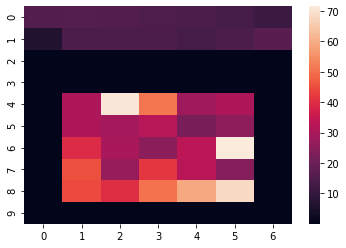

In [43]:
sns.heatmap(l_np_1ch)

In [71]:
obs_example = ctx['obs_x'].detach().cpu().numpy()
obs_example = obs_example[:, :, :, 2]
#obs_example = np.mean(obs_example, axis=3)

[04/15/21 12:53:06] DEBUG    DEBUG:matplotlib.colorbar:locator:               ]8;id=1618483986.459073-231632;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:620
                             <matplotlib.colorbar._ColorbarAutoLocator object                
                             at 0x7f9efc4f5990>

                    DEBUG    DEBUG:matplotlib.colorbar:Using auto colorbar    ]8;id=1618483986.4628713-410949;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:665
                             locator                                                         
                             <matplotlib.colorbar._ColorbarAutoLocator object                
                             at 0x7f9efc4f5990> on colorbar

                    DEBUG    DEBUG:matplotlib.colorbar:Setting pcolormesh     ]8;id=1618483986.4657636-872654;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:794

<AxesSubplot:>

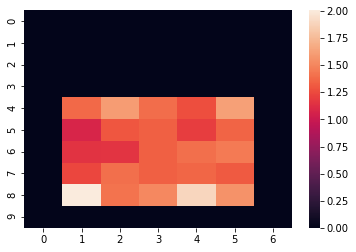

In [72]:
sns.heatmap(np.mean(obs_example, axis=0))

[04/15/21 12:53:07] DEBUG    DEBUG:matplotlib.colorbar:locator:               ]8;id=1618483987.8368266-165095;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:620
                             <matplotlib.colorbar._ColorbarAutoLocator object                
                             at 0x7f9efc47b850>

                    DEBUG    DEBUG:matplotlib.colorbar:Using auto colorbar    ]8;id=1618483987.8403418-899758;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:665
                             locator                                                         
                             <matplotlib.colorbar._ColorbarAutoLocator object                
                             at 0x7f9efc47b850> on colorbar

                    DEBUG    DEBUG:matplotlib.colorbar:Setting pcolormesh     ]8;id=1618483987.843018-743259;file:///home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:794

<AxesSubplot:>

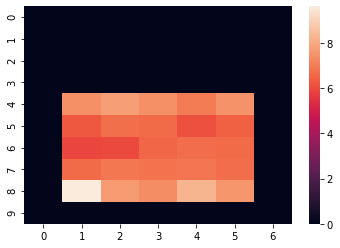

In [73]:
sns.heatmap(np.std(obs_example, axis=0))